In [1]:
using DataStructures, Plots

In [2]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

204-element Array{Int64,1}:
 100
  49
  41
  40
  25
  21
  21
  19
  19
  18
  18
  16
  15
   ⋮
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1

In [3]:
friend_counts = counter(num_friends)

Accumulator{Int64,Int64} with 24 entries:
  12  => 2
  1   => 22
  100 => 1
  2   => 17
  40  => 1
  16  => 1
  11  => 1
  21  => 2
  7   => 15
  9   => 18
  25  => 1
  10  => 15
  19  => 2
  49  => 1
  8   => 13
  6   => 22
  4   => 20
  3   => 20
  5   => 17
  14  => 2
  13  => 4
  15  => 4
  41  => 1
  18  => 2

In [4]:
xs = 0:100

0:100

In [5]:
ys = [friend_counts[x] for x in xs]

101-element Array{Int64,1}:
  0
 22
 17
 20
 20
 17
 22
 15
 13
 18
 15
  1
  2
  ⋮
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  1

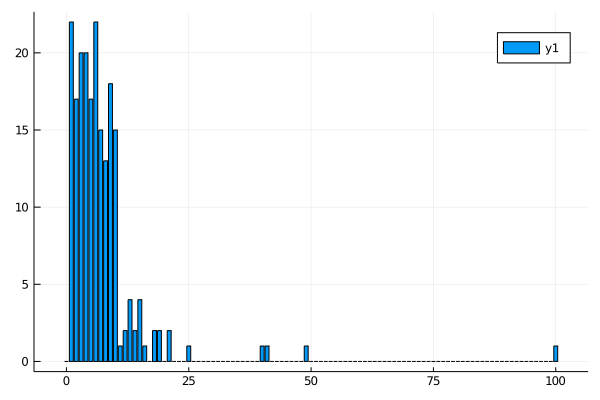

In [6]:
bar(xs, ys)

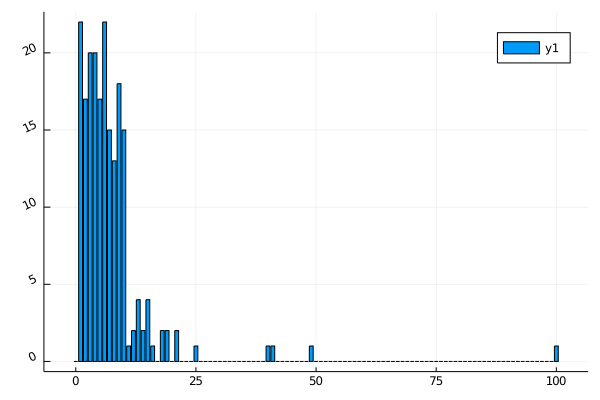

In [7]:
yaxis!(0, 25)

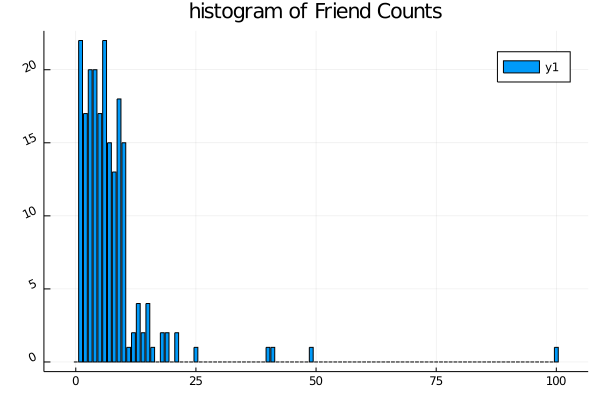

In [8]:
title!("histogram of Friend Counts")

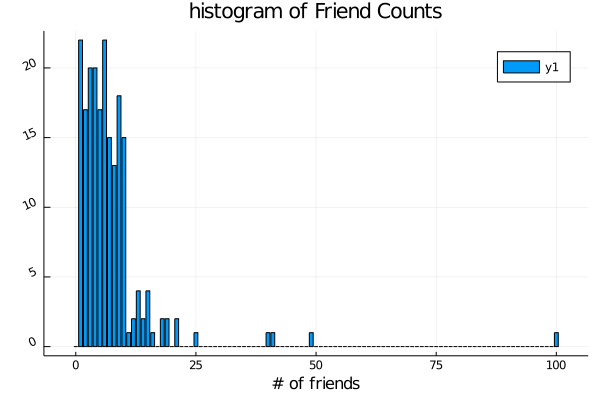

In [9]:
xlabel!("# of friends")

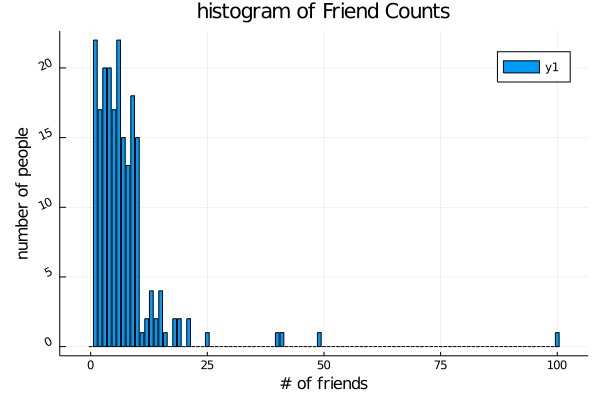

In [10]:
ylabel!("number of people")

In [11]:
num_points = length(num_friends)

204

In [12]:
largest_value, smallest_value = extrema(num_friends)

(1, 100)

In [13]:
sorted_values = sort(num_friends)

204-element Array{Int64,1}:
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   1
   ⋮
  16
  18
  18
  19
  19
  21
  21
  25
  40
  41
  49
 100

In [14]:
smallest_value = sorted_values[1]

1

In [15]:
second_smallest_value = sorted_values[2]

1

In [16]:
second_largest_value = sorted_values[end-1]

49

In [17]:
mean(xs) = sum(xs) / length(xs)

mean (generic function with 1 method)

In [18]:
mean(num_friends)

7.333333333333333

In [19]:
_median_odd(xs) = sort(xs)[(end + 1) ÷ 2]

_median_odd (generic function with 1 method)

In [20]:
function _median_even(xs) 
    sorted_xs = sort(xs)
    (sorted_xs[end ÷ 2] + sorted_xs[(end ÷ 2) + 1]) / 2
end

_median_even (generic function with 1 method)

In [21]:
median(v) = length(v) % 2 == 0 ? _median_even(v) : _median_odd(v)

median (generic function with 1 method)

In [22]:
@assert median([1, 10, 2, 9, 5]) == 5

In [23]:
@assert median([1, 9, 2, 10]) == (2 + 9) / 2

In [24]:
median(num_friends)

6.0

In [25]:
import Statistics

In [27]:
Statistics.mean([1, 10, 2, 9, 5])

5.4

In [31]:
Statistics.median([1, 10, 2, 9, 5])

5.0

In [32]:
Statistics.median([1, 9, 2, 10])

5.5

In [40]:
function quantile(xs, p)
    p_index = Int(trunc(p * length(xs)))
    sort(xs)[p_index]
end

quantile (generic function with 1 method)

In [42]:
@assert quantile(num_friends, 0.1) == 1

In [44]:
@assert quantile(num_friends, 0.25) == 3

In [45]:
@assert quantile(num_friends, 0.75) == 9

In [46]:
@assert quantile(num_friends, 0.9) == 13

In [52]:
for x in [0.1, 0.25, 0.75, 0.9]
    @assert quantile(num_friends, x) == Statistics.quantile(num_friends, x)
end

In [55]:
function mode(x)
    counts = counter(x)
    max_count = maximum(values(counts))
    [x_i for (x_i, count) in pairs(counts) if count == max_count]
end

mode (generic function with 1 method)

In [58]:
@assert Set(mode(num_friends)) == Set([1, 6])

In [62]:
data_range(xs) = maximum(xs) - minimum(xs)

data_range (generic function with 1 method)

In [63]:
@assert data_range(num_friends) == 99

In [64]:
function de_mean(xs)
    x_bar = mean(xs)
    [x - x_bar for x in xs]
end

de_mean (generic function with 1 method)

In [70]:
function variance(xs)
    n = length(xs)
    @assert n >= 2 "Variance requires at least two elements"
    deviations = de_mean(xs)
    sum(x^2 for x in deviations) / (n - 1)
end

variance (generic function with 1 method)

In [71]:
@assert 81.54 < variance(num_friends) < 81.55

In [73]:
@assert 81.54 < Statistics.var(num_friends) < 81.55

In [74]:
standard_deviation(xs) = sqrt(variance(xs))

standard_deviation (generic function with 1 method)

In [75]:
@assert 9.02 < standard_deviation(num_friends) < 9.04

In [76]:
@assert 9.02 < Statistics.std(num_friends) < 9.04

In [77]:
interquartile_range(xs) = quantile(xs, 0.75) - quantile(xs, 0.25)

interquartile_range (generic function with 1 method)

In [78]:
@assert interquartile_range(num_friends) == 6

In [79]:
using LinearAlgebra

In [81]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

daily_hours = [dm / 60 for dm in daily_minutes]

204-element Array{Float64,1}:
 0.016666666666666666
 1.1461666666666666
 0.8541666666666666
 0.868
 0.6393333333333333
 0.7423333333333333
 0.9521666666666667
 0.8566666666666667
 0.6903333333333334
 0.5203333333333333
 0.5793333333333333
 0.9001666666666667
 0.6465
 ⋮
 0.5155
 0.2505
 0.3611666666666667
 0.5181666666666667
 0.5548333333333333
 0.3768333333333333
 0.44816666666666666
 0.39133333333333337
 0.1396666666666667
 0.46349999999999997
 0.5391666666666667
 0.3973333333333333

In [80]:
covariance(xs, ys) = dot(de_mean(xs), de_mean(ys)) / (length(xs) - 1)

covariance (generic function with 1 method)

In [82]:
@assert 22.42 < covariance(num_friends, daily_minutes) < 22.43

In [83]:
@assert 22.42 / 60 < covariance(num_friends, daily_hours) < 22.43 / 60

In [84]:
@assert 22.42 / 60 < Statistics.cov(num_friends, daily_hours) < 22.43 / 60

In [86]:
function correlation(xs, ys)
    stddev_x = standard_deviation(xs)
    stddev_y = standard_deviation(ys)
    if stddev_x > 0 && stddev_y > 0
        covariance(xs, ys) / stddev_x / stddev_y
    else
        0
    end
end

correlation (generic function with 1 method)

In [87]:
@assert 0.24 < correlation(num_friends, daily_minutes) < 0.25

In [90]:
@assert 0.24 < correlation(num_friends, daily_hours) < 0.25

In [91]:
@assert 0.24 < Statistics.cor(num_friends, daily_hours) < 0.25

In [99]:
outlier = findfirst(x -> x == 100, 100)

1

In [100]:
num_friends_good = [x for (i, x) in enumerate(num_friends) if i != outlier]

203-element Array{Int64,1}:
 49
 41
 40
 25
 21
 21
 19
 19
 18
 18
 16
 15
 15
  ⋮
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1

In [101]:
daily_minutes_good = [x for (i, x) in enumerate(daily_minutes) if i != outlier]

203-element Array{Float64,1}:
 68.77
 51.25
 52.08
 38.36
 44.54
 57.13
 51.4
 41.42
 31.22
 34.76
 54.01
 38.79
 47.59
  ⋮
 30.93
 15.03
 21.67
 31.09
 33.29
 22.61
 26.89
 23.48
  8.38
 27.81
 32.35
 23.84

In [102]:
daily_hours_good = [dm / 60 for dm in daily_minutes_good]

203-element Array{Float64,1}:
 1.1461666666666666
 0.8541666666666666
 0.868
 0.6393333333333333
 0.7423333333333333
 0.9521666666666667
 0.8566666666666667
 0.6903333333333334
 0.5203333333333333
 0.5793333333333333
 0.9001666666666667
 0.6465
 0.7931666666666667
 ⋮
 0.5155
 0.2505
 0.3611666666666667
 0.5181666666666667
 0.5548333333333333
 0.3768333333333333
 0.44816666666666666
 0.39133333333333337
 0.1396666666666667
 0.46349999999999997
 0.5391666666666667
 0.3973333333333333

In [104]:
@assert 0.57 < correlation(num_friends_good, daily_minutes_good) < 0.58

In [105]:
@assert 0.57 < correlation(num_friends_good, daily_hours_good) < 0.58

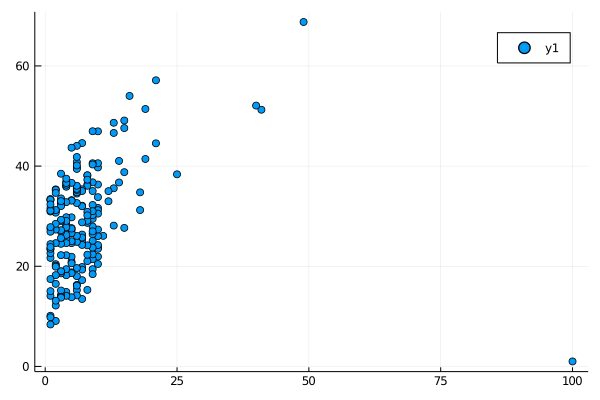

In [108]:
scatter(num_friends, daily_minutes)